OLLDEWLOR


<Figure size 360x360 with 0 Axes>

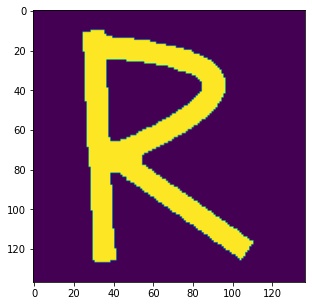

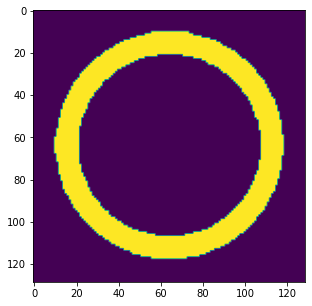

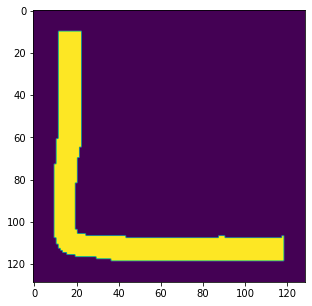

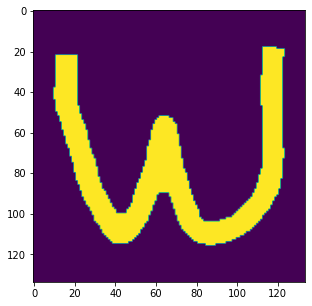

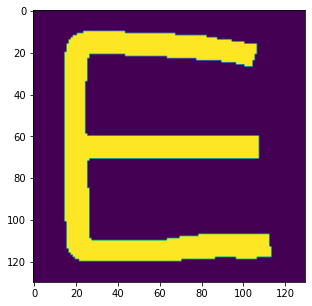

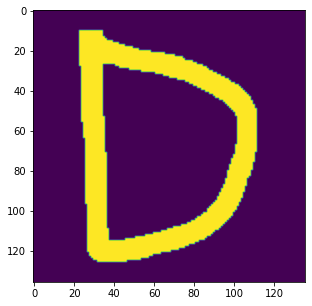

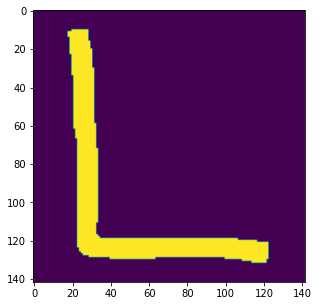

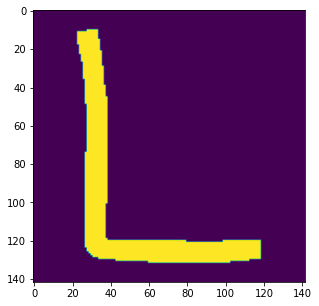

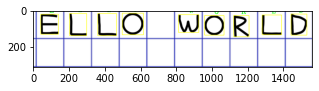

In [19]:
import cv2 
#import imageio
#import scipy
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.models import load_model
s = ''
model = load_model('emnist_trained.h5')#훈련 모델 데려오기
img_color = cv2.imread('./test_data/example.PNG',cv2.IMREAD_COLOR) # 이미지 불러오기 (경로만 바꾸어주면 됨)
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY) #흑백으로 바꾸어줌

for i in range(img_gray.shape[0]): #격자없애기(파란색을 기준으로 모든 색은 흰색으로 바꿈)
    for j in range(img_gray.shape[1]):
        if img_gray[i][j] > 30 :
            img_gray[i][j] = 255

#이진화
ret, img_binary = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
img_binary = cv2.morphologyEx(img_binary, cv2.MORPH_CLOSE, kernel)
plt.figure(figsize=(5,5))

#문자 인식
contours, hierarchy = cv2.findContours(img_binary, cv2.RETR_EXTERNAL,
                                    cv2.CHAIN_APPROX_SIMPLE)
#경계선대로 이미지 예측
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    length = max(w,h)+20
    if(w>h): #정사각형으로 틀을 만들기 위해 새로운 new_x, new_y생성
        mid1 = (w-h)//2
        new_x = x-10
        new_y = y-mid1-10
    else:
        mid2 = (h-w)//2
        new_y = y-10
        new_x = x-mid2-10
    plt.figure(figsize=(5,5))   
    img_digit = np.zeros((length, length, 1), np.uint8)
    img_digit = img_binary[new_y:new_y+length, new_x:new_x+length]#이미지 크롭
    plt.imshow(img_digit)
    kernel = np.ones((5,5), np.uint8)
    img_digit = cv2.morphologyEx(img_digit, cv2.MORPH_DILATE, kernel)
    
    #예측하기 위해 모델 학습한 이미지와 크기 같게 만들기
    img_digit = cv2.resize(img_digit, (28, 28), interpolation = cv2.INTER_AREA)
    img_digit = img_digit /255.0
    img_input = img_digit.flatten().reshape(-1, 28* 28)
    predictions = model.predict(img_input)
    
    number = np.argmax(predictions)
    
    #예측한 부분 표시를 위한 부분
    cv2.rectangle(img_color, (x,y), (x+w, y+h), (255, 255, 0), 2)
    #아래 주석은 정사각형으로 인식된 부분을 보여줌--> 보려면 주석 풀면 됨
    #cv2.rectangle(img_color, (new_x-10, new_y-10), (new_x+length+10, new_y+length+10), (255, 100, 100), 2)
    location = (x+ int(w*0.5), y - 10)
    font = cv2.FONT_HERSHEY_COMPLEX
    fontScale = 1.2
    #print(chr(number+64), end = '')
    cv2.putText(img_color, chr(number+64), location, font, fontScale, (0,255,0),2)
    s = s+ chr(number+64)
    #print(chr(number+64), end = '') #출력
s = s[::-1]
print(s)
plt.imshow(img_color)
